In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

%matplotlib inline  

In [40]:
account = pd.read_csv('raw/account.csv',sep=';')
card = pd.read_csv('raw/card_dev.csv',sep=';')
client = pd.read_csv('raw/client.csv',sep=';')
disp = pd.read_csv('raw/disp.csv', sep=';')
district = pd.read_csv('raw/district.csv', sep=';')
loan = pd.read_csv('raw/loan_dev.csv', sep=';')
trans = pd.read_csv('raw/trans_dev.csv', sep=';')

c:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data processing

### Extract gender and birth date from birth number

The gender and birth date can be extracted from the birth number.

In [41]:
# YYMMDD for men
# YYMM+50DD for women

client['gender'] = client.apply(lambda row: 'M' if (row['birth_number']//100)%100 < 50 else 'F', axis=1)
client['birth_date'] = client.apply(lambda row: "19{:02d}-{:02d}-{:02d}".format((row['birth_number']//10000)%100,((row['birth_number']//100)%100 if row['gender'] == 'M' else (row['birth_number']//100)%100 - 50), (row['birth_number'])%100), axis=1)
client.drop('birth_number', inplace=True, axis=1)
client['birth_date'] = client['birth_date'].apply(pd.to_datetime)

client

,client_id,district_id,gender,birth_date
0,1,18,F,1970-12-13
1,2,1,M,1945-02-04
2,3,1,F,1940-10-09
3,4,5,M,1956-12-01
4,5,5,F,1960-07-03
...,...,...,...,...
5364,13955,1,F,1945-10-30
5365,13956,1,M,1943-04-06
5366,13968,61,M,1968-04-13
5367,13971,67,F,1962-10-19


In [42]:
def formatDate(df, column):
    df[column] = df[column].apply(lambda cell: "19{:02d}-{:02d}-{:02d}".format((cell//10000)%100, (cell//100)%100, cell%100))
    df[column] = df[column].apply(pd.to_datetime)

formatDate(account, "date")
formatDate(loan, "date")
formatDate(trans, "date")
formatDate(card, "issued")

### Separate a date's fields

We can divide the date column into day, year, month and day of week columns.

In [43]:
def processDate(df, column):
    df[column + "_year"]     = df[column].dt.year
    df[column + "_month"]    = df[column].dt.month
    df[column + "_day"]      = df[column].dt.day
    df[column + "_day_week"] = df[column].dt.dayofweek
    #df.drop(column, inplace=True, axis=1)

processDate(account, "date")
processDate(client, "birth_date")
processDate(loan, "date")
processDate(trans, "date")
processDate(card, "issued")

### Nulls

#### Account

In [44]:
account.isnull().sum()

account_id       0
district_id      0
frequency        0
date             0
date_year        0
date_month       0
date_day         0
date_day_week    0
dtype: int64

#### Client

In [45]:
client.isnull().sum()

client_id              0
district_id            0
gender                 0
birth_date             0
birth_date_year        0
birth_date_month       0
birth_date_day         0
birth_date_day_week    0
dtype: int64

#### Loan

In [46]:
loan.isnull().sum()

loan_id          0
account_id       0
date             0
amount           0
duration         0
payments         0
status           0
date_year        0
date_month       0
date_day         0
date_day_week    0
dtype: int64

#### Transaction

In [47]:
trans.isnull().sum()

trans_id              0
account_id            0
date                  0
type                  0
operation         70761
amount                0
balance               0
k_symbol         185244
bank             299443
account          294456
date_year             0
date_month            0
date_day              0
date_day_week         0
dtype: int64

#### Card

In [48]:
card.isnull().sum()

card_id            0
disp_id            0
type               0
issued             0
issued_year        0
issued_month       0
issued_day         0
issued_day_week    0
dtype: int64

#### Disposition

In [49]:
disp.isnull().sum()

disp_id       0
client_id     0
account_id    0
type          0
dtype: int64

#### District

In [50]:
district.isnull().sum()

code                                                 0
name                                                 0
region                                               0
no. of inhabitants                                   0
no. of municipalities with inhabitants < 499         0
no. of municipalities with inhabitants 500-1999      0
no. of municipalities with inhabitants 2000-9999     0
no. of municipalities with inhabitants >10000        0
no. of cities                                        0
ratio of urban inhabitants                           0
average salary                                       0
unemploymant rate '95                                0
unemploymant rate '96                                0
no. of enterpreneurs per 1000 inhabitants            0
no. of commited crimes '95                           0
no. of commited crimes '96                           0
dtype: int64

### Merging tables

#### Merging client table with district table

In [51]:
client_district = client.merge(district, left_on='district_id', right_on='code ')
client_district

,client_id,district_id,gender,birth_date,birth_date_year,birth_date_month,birth_date_day,birth_date_day_week,code,name,...,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,18,F,1970-12-13,1970,12,13,6,18,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
1,420,18,M,1978-03-13,1978,3,13,0,18,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
2,499,18,F,1935-07-08,1935,7,8,0,18,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
3,519,18,M,1980-04-13,1980,4,13,6,18,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
4,682,18,M,1979-10-21,1979,10,21,6,18,Pisek,...,2,1,4,65.3,8968,2.83,3.35,131,1740,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,9930,9,M,1972-06-23,1972,6,23,4,9,Nymburk,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5365,10070,9,M,1974-04-23,1974,4,23,1,9,Nymburk,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5366,11266,9,M,1938-09-25,1938,9,25,6,9,Nymburk,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487
5367,11267,9,F,1936-08-26,1936,8,26,2,9,Nymburk,...,4,2,6,55.3,8899,3.39,3.97,149,2987,2487


#### Merging Account table with Client table

In [52]:
account_client = disp.merge(client, left_on="client_id", right_on='client_id')
account_client = account_client.merge(account, left_on="account_id", right_on="account_id")
account_client.rename({"date": "account_creation_date", 
                        'date_year': 'account_creation_year', 
                        'date_day': 'account_creation_day', 
                        "date_month": "account_creation_month", 
                        "date_day_week": "account_creation_day_week"}, axis=1, inplace=True)
display(account_client)

,disp_id,client_id,account_id,type,district_id_x,gender,birth_date,birth_date_year,birth_date_month,birth_date_day,birth_date_day_week,district_id_y,frequency,account_creation_date,account_creation_year,account_creation_month,account_creation_day,account_creation_day_week
0,1,1,1,OWNER,18,F,1970-12-13,1970,12,13,6,18,monthly issuance,1995-03-24,1995,3,24,4
1,2,2,2,OWNER,1,M,1945-02-04,1945,2,4,6,1,monthly issuance,1993-02-26,1993,2,26,4
2,3,3,2,DISPONENT,1,F,1940-10-09,1940,10,9,2,1,monthly issuance,1993-02-26,1993,2,26,4
3,4,4,3,OWNER,5,M,1956-12-01,1956,12,1,5,5,monthly issuance,1997-07-07,1997,7,7,0
4,5,5,3,DISPONENT,5,F,1960-07-03,1960,7,3,6,5,monthly issuance,1997-07-07,1997,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5364,13647,13955,11349,OWNER,1,F,1945-10-30,1945,10,30,1,1,weekly issuance,1995-05-26,1995,5,26,4
5365,13648,13956,11349,DISPONENT,1,M,1943-04-06,1943,4,6,1,1,weekly issuance,1995-05-26,1995,5,26,4
5366,13660,13968,11359,OWNER,61,M,1968-04-13,1968,4,13,5,61,monthly issuance,1994-10-01,1994,10,1,5
5367,13663,13971,11362,OWNER,67,F,1962-10-19,1962,10,19,4,67,monthly issuance,1995-10-14,1995,10,14,5


#### Merging Loan table with Account table

In [53]:
loan_account = account_client.merge(loan, left_on="account_id", right_on='account_id', how="inner")
loan_account.rename({"date": "loan_date", 
                        'date_year': 'loan_year', 
                        'date_day': 'loan_day', 
                        "date_month": "loan_month", 
                        "date_day_week": "loan_day_week"}, axis=1, inplace=True)

# remove the disponent entries
loan_account_owners = loan_account[loan_account["type"]!="DISPONENT"]
loan_account_owners
display(loan_account.columns)
loan_account.frequency

Index(['disp_id', 'client_id', 'account_id', 'type', 'district_id_x', 'gender',
       'birth_date', 'birth_date_year', 'birth_date_month', 'birth_date_day',
       'birth_date_day_week', 'district_id_y', 'frequency',
       'account_creation_date', 'account_creation_year',
       'account_creation_month', 'account_creation_day',
       'account_creation_day_week', 'loan_id', 'loan_date', 'amount',
       'duration', 'payments', 'status', 'loan_year', 'loan_month', 'loan_day',
       'loan_day_week'],
      dtype='object')

0                monthly issuance
1                monthly issuance
2                monthly issuance
3                monthly issuance
4      issuance after transaction
                  ...            
398              monthly issuance
399               weekly issuance
400               weekly issuance
401              monthly issuance
402              monthly issuance
Name: frequency, Length: 403, dtype: object

#### Merging card table with client table

In [54]:
disp2 = disp.rename(columns={"type": "disp_type"})
card2 = card.rename(columns={"type": "card_type"})

card_disp = card2.merge(disp2, how="outer")
card_disp_client = pd.merge(card_disp, client).drop_duplicates(subset=['account_id'])
card_disp_client

,card_id,disp_id,card_type,issued,issued_year,issued_month,issued_day,issued_day_week,client_id,account_id,disp_type,district_id,gender,birth_date,birth_date_year,birth_date_month,birth_date_day,birth_date_day_week
0,1005.0,9285,classic,1993-11-07,1993.0,11.0,7.0,6.0,9593,7753,OWNER,74,F,1968-01-28,1968,1,28,6
1,104.0,588,classic,1994-01-19,1994.0,1.0,19.0,2.0,588,489,OWNER,61,F,1960-10-20,1960,10,20,3
2,747.0,4915,classic,1994-02-05,1994.0,2.0,5.0,5.0,4915,4078,OWNER,40,M,1963-07-19,1963,7,19,4
3,70.0,439,classic,1994-02-08,1994.0,2.0,8.0,1.0,439,361,OWNER,51,F,1968-09-12,1968,9,12,3
4,577.0,3687,classic,1994-02-15,1994.0,2.0,15.0,1.0,3687,3050,OWNER,49,M,1972-02-06,1972,2,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5363,NaN,13616,NaN,NaT,NaN,NaN,NaN,NaN,13924,11328,OWNER,54,F,1952-09-09,1952,9,9,1
5364,NaN,13623,NaN,NaT,NaN,NaN,NaN,NaN,13931,11333,OWNER,8,M,1942-01-01,1942,1,1,3
5365,NaN,13647,NaN,NaT,NaN,NaN,NaN,NaN,13955,11349,OWNER,1,F,1945-10-30,1945,10,30,1
5367,NaN,13663,NaN,NaT,NaN,NaN,NaN,NaN,13971,11362,OWNER,67,F,1962-10-19,1962,10,19,4


### Adding client age column to loan

In [55]:
import datetime
from datetime import datetime, date
def age(born_date_str, loan_date_str):
    born_date = datetime.strptime(str(born_date_str).split(" ")[0], "%Y-%m-%d").date()
    loan_date = datetime.strptime(str(loan_date_str).split(" ")[0], "%Y-%m-%d").date()

    return loan_date.year - born_date.year - ((loan_date.month, 
                                      loan_date.day) < (born_date.month, 
                                                    born_date.day))
  
col = loan_account_owners.apply(lambda row: age(row["birth_date"], row["loan_date"]), axis=1)
loan_account_owners = loan_account_owners.assign(client_age=col.values)
loan_account_owners["client_age"]


0      48
2      57
3      51
4      51
6      54
       ..
396    15
398    20
399    49
401    28
402    34
Name: client_age, Length: 328, dtype: int64

### Add No card type to Card client table

In [56]:
card_disp_client.loc[card_disp_client["card_type"].isna()] = "no card"
card_disp_client["card_type"]

0       classic
1       classic
2       classic
3       classic
4       classic
         ...   
5363    no card
5364    no card
5365    no card
5367    no card
5368    no card
Name: card_type, Length: 4500, dtype: object

### Add customer ratio column to district table

In [57]:
district_client = pd.DataFrame(client_district.groupby(['name ', "no. of inhabitants"], axis = 0)['name '].count())
district_client.columns = ['count']
district_client.reset_index(inplace=True)
district_client['client_ratio'] = district_client['count'] / district_client["no. of inhabitants"] * 100
district = district.merge(district_client[["name ","client_ratio"]], left_on='name ', right_on='name ')
district

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,client_ratio
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,0.055023
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,0.051753
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,0.083741
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,0.033357
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,0.074255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433,0.032962
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347,0.055578
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505,0.040570
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807,0.047892


### Add inhabitant number (in millions) column to district table

In [58]:
district["no. of inhabitants_mln"] = district["no. of inhabitants"] / 1000000
district

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96,client_ratio,no. of inhabitants_mln
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,0.055023,1.204953
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,0.051753,0.088884
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,0.083741,0.075232
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,0.033357,0.149893
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,0.074255,0.095616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433,0.032962,0.182027
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347,0.055578,0.323870
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505,0.040570,0.138032
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807,0.047892,0.127369


# Data analysis

### Transaction statistics

In [59]:
trans.describe()

,trans_id,account_id,amount,balance,account,date_year,date_month,date_day,date_day_week
count,3.966850e+05,396685.000000,396685.000000,396685.000000,1.022290e+05,396685.000000,396685.000000,396685.000000,396685.000000
mean,1.239338e+06,2508.434796,5677.552980,35804.792507,4.664229e+07,1995.061089,6.806983,18.480782,3.000250
std,1.213288e+06,2020.928889,9190.364137,19692.148243,3.002136e+07,0.953892,3.585339,10.238783,1.993017
min,1.000000e+00,1.000000,0.000000,-13588.700000,0.000000e+00,1993.000000,1.000000,1.000000,0.000000
25%,3.918330e+05,1092.000000,127.500000,22424.300000,1.990018e+07,1994.000000,4.000000,9.000000,1.000000
50%,7.882580e+05,2220.000000,1952.000000,30959.600000,4.673618e+07,1995.000000,7.000000,16.000000,3.000000
75%,1.273700e+06,3357.000000,6500.000000,44661.000000,7.232217e+07,1996.000000,10.000000,30.000000,5.000000
max,3.682934e+06,11382.000000,86400.000000,193909.900000,9.998564e+07,1996.000000,12.000000,31.000000,6.000000


### District statistics

In [60]:
district.describe()

,code,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '96,client_ratio,no. of inhabitants_mln
count,77.000000,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,1.338849e+05,48.623377,24.324675,6.272727,1.727273,6.259740,63.035065,9031.675325,3.787013,116.129870,5030.831169,0.057953,0.133885
std,22.371857,1.369135e+05,32.741829,12.780991,4.015222,1.008338,2.435497,16.221727,790.202347,1.908480,16.608773,11270.796786,0.023116,0.136913
min,1.000000,4.282100e+04,0.000000,0.000000,0.000000,0.000000,1.000000,33.900000,8110.000000,0.430000,81.000000,888.000000,0.025326,0.042821
25%,20.000000,8.585200e+04,22.000000,16.000000,4.000000,1.000000,5.000000,51.900000,8512.000000,2.310000,105.000000,2122.000000,0.040790,0.085852
50%,39.000000,1.088710e+05,49.000000,25.000000,6.000000,2.000000,6.000000,59.800000,8814.000000,3.600000,113.000000,3040.000000,0.052821,0.108871
75%,58.000000,1.390120e+05,71.000000,32.000000,8.000000,2.000000,8.000000,73.500000,9317.000000,4.790000,126.000000,4595.000000,0.066738,0.139012
max,77.000000,1.204953e+06,151.000000,70.000000,20.000000,5.000000,11.000000,100.000000,12541.000000,9.400000,167.000000,99107.000000,0.142453,1.204953


### District inhabitant, average salary, customer ratio

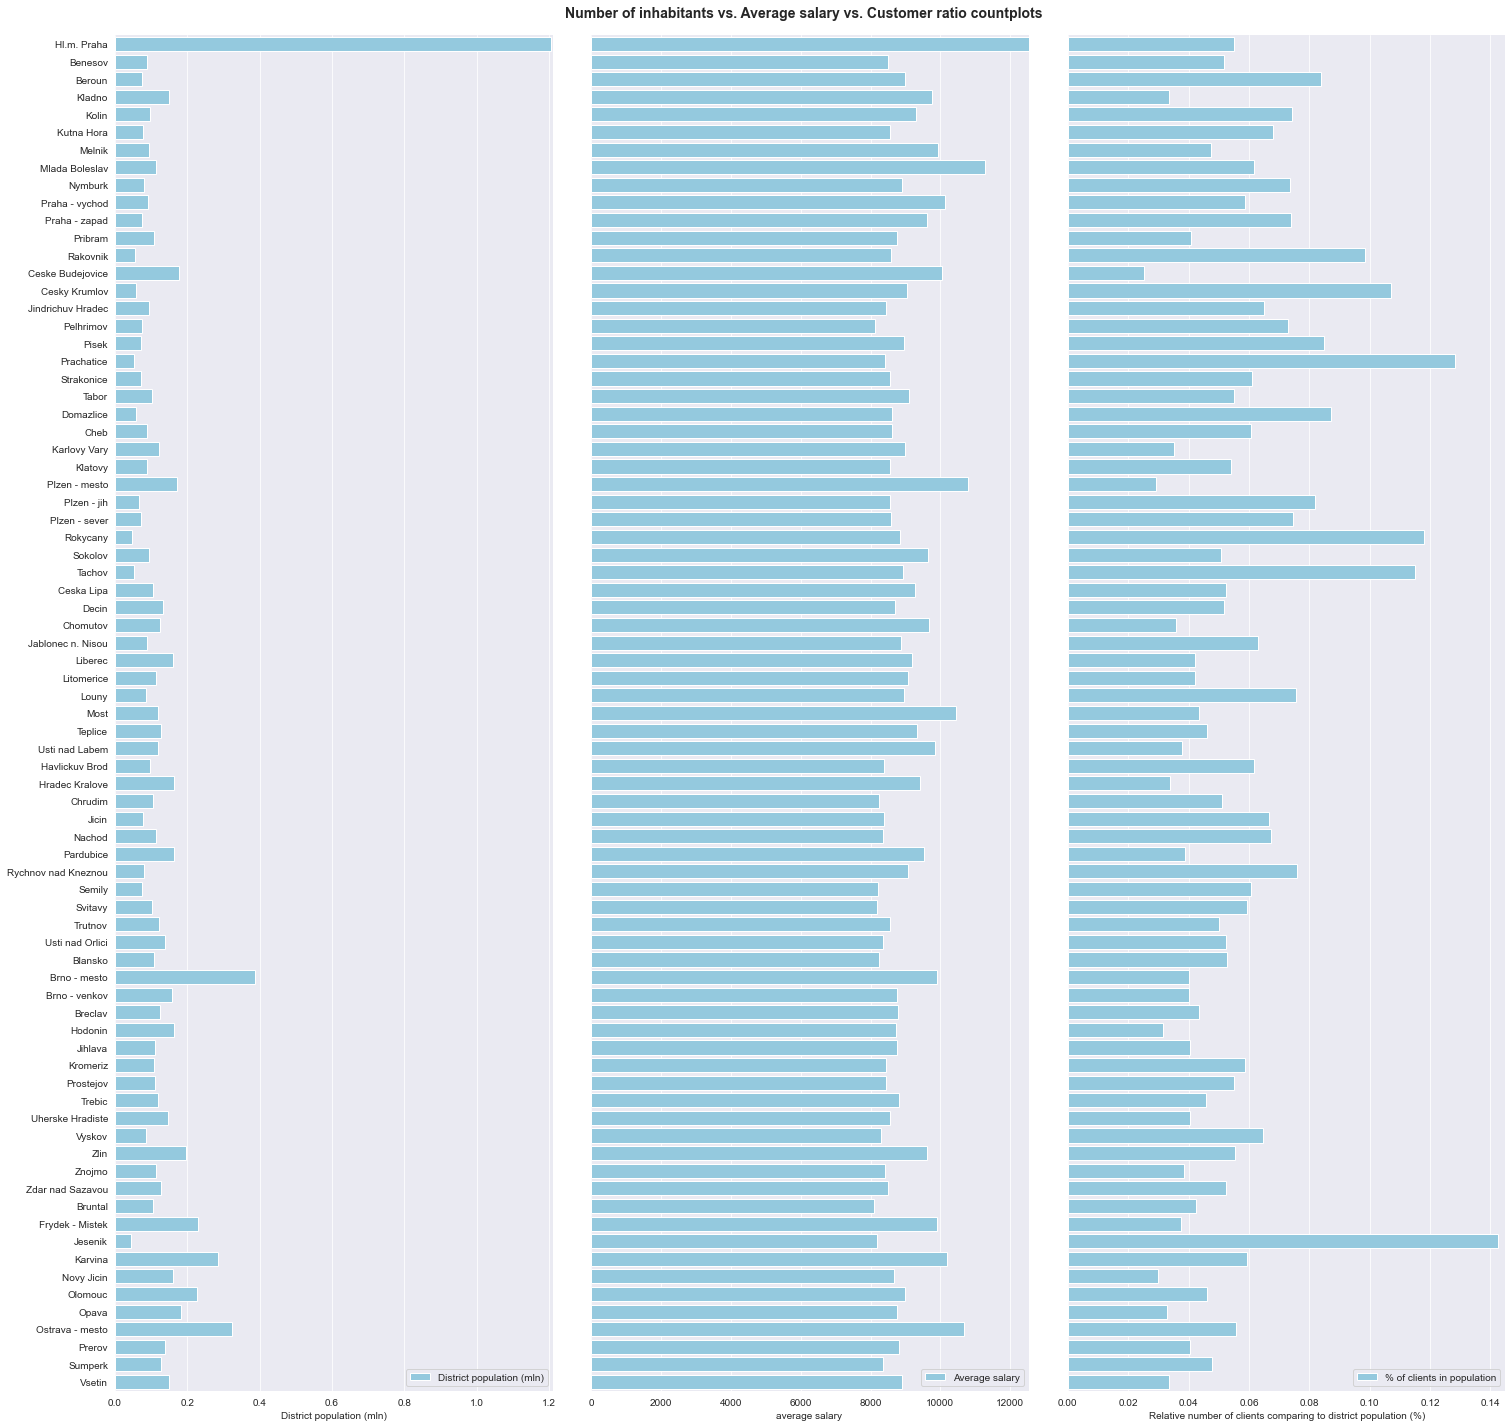

In [61]:
#plotting Number of inhabitants vs. Average salary vs. Customers proportion within population of districts

sns.set_style(style="darkgrid")

## Initialize the matplotlib figure:
fig2, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,20), sharey=False)
fig2.tight_layout()  #When working with 'tight_layout', the subplot must be adjusted [https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot]
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

## Plot the District population
sns.set_color_codes("muted")
sns.barplot(x="no. of inhabitants_mln", y="name ", data=district, label = 'District population (mln)',color="skyblue", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower right", frameon=True)
ax1.set(xlim=(0, 1.21), ylabel="", xlabel="District population (mln)")
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the Average salary
sns.set_color_codes("muted")
sns.barplot(x="average salary ", y="name ", data=district, label="Average salary", color="skyblue", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 12541), ylabel="", xlabel="average salary ")  #The xlim value comes from the maximum value in the dataset.
ax2.set_yticklabels([''])
sns.despine(left=True, bottom=True, ax=ax2)

sns.set_color_codes("muted")
sns.barplot(x="client_ratio", y="name ", data=district, label="% of clients in population", color="skyblue", ax=ax3)
## Add a legend and informative axis label
ax3.legend(ncol=2, loc="lower right", frameon=True)
ax3.set(xlim=(0, 0.145), ylabel="", xlabel="Relative number of clients comparing to district population (%)")  #The xlim value comes from the maximum value in the dataset.
ax3.set_yticklabels([''])
sns.despine(left=True, bottom=True, ax=ax3)

plt.suptitle('Number of inhabitants vs. Average salary vs. Customer ratio countplots', fontsize=14, fontweight='bold')
plt.savefig("../plots/inhabitants_avgsalary_customerratio.png", bbox_inches='tight')
plt.show()

### Loan amount vs payment duration

In [62]:
#sns.set_style(style="darkgrid")
#fig = plt.gcf()
#fig.set_size_inches(7, 7)
#display(loan)
#sns.scatterplot(data=loan, x="duration", y="amount", color="red")
#plt.show()




### Gender proportion

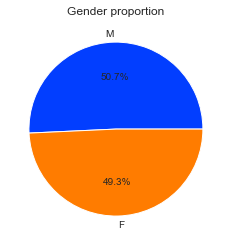

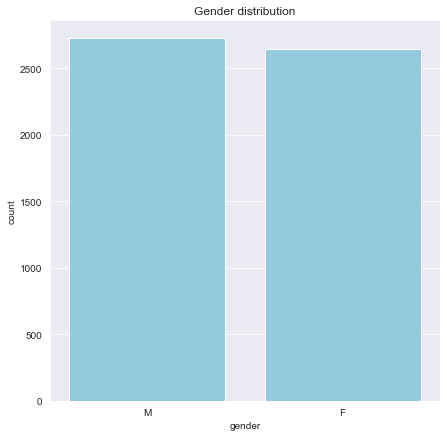

In [63]:
colors = sns.color_palette('bright')[0:5]
plt.pie(client['gender'].value_counts(), labels=['M', 'F'], colors=colors, autopct='%1.1f%%')
plt.title("Gender proportion")
plt.savefig("../plots/gender_pie.png", bbox_inches='tight')
plt.show()

sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.countplot(data=client, x="gender", color="skyblue", order=client["gender"].value_counts().index )
plt.title("Gender distribution")

plt.savefig("../plots/gender_count.png", bbox_inches='tight')

plt.show()

### Age at loan distribution

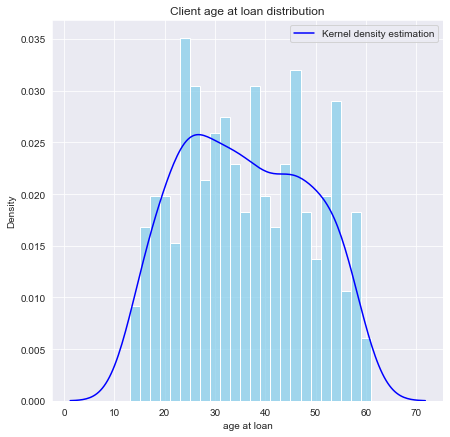

In [64]:
sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)

hp = sns.histplot(data=loan_account_owners, x="client_age", color="skyblue", binwidth=2, stat="density")
kp = sns.kdeplot(data=loan_account_owners, x="client_age", color="blue", ax=hp, label="Kernel density estimation")
#plt.title(fig_title)
plt.xlabel('age at loan')
plt.legend()
plt.title("Client age at loan distribution")
plt.savefig("../plots/client_age_dist.png", bbox_inches='tight')
plt.show()

### Loan status proportion

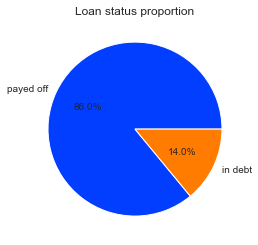

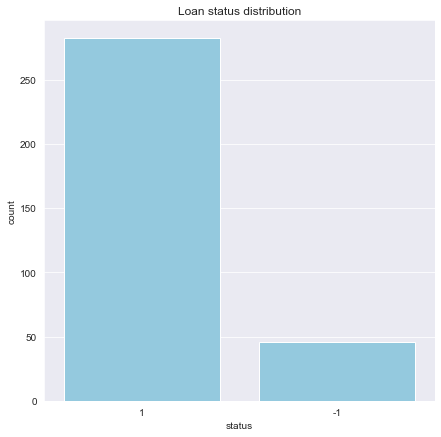

In [65]:
colors = sns.color_palette('bright')[0:5]
plt.pie(loan['status'].value_counts(), labels=['payed off', 'in debt'], colors = colors, autopct='%1.1f%%')
plt.title("Loan status proportion")
plt.savefig("../plots/loan_status_pie.png", bbox_inches='tight')
plt.show()

sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)
# TODO
sns.countplot(data=loan, x="status", color="skyblue", order=loan["status"].value_counts().index )
plt.title("Loan status distribution")
plt.savefig("../plots/loan_status_count.png", bbox_inches='tight')
plt.show()


### Card type proportion

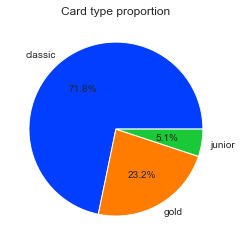

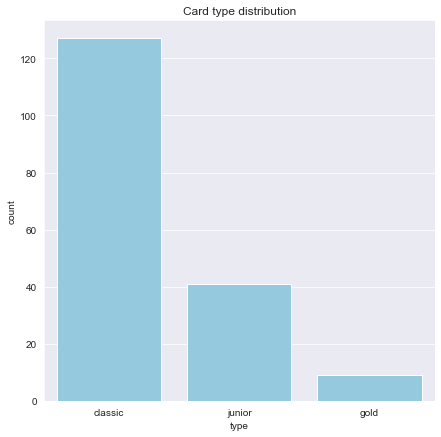

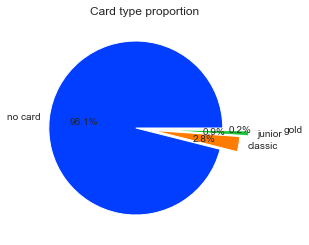

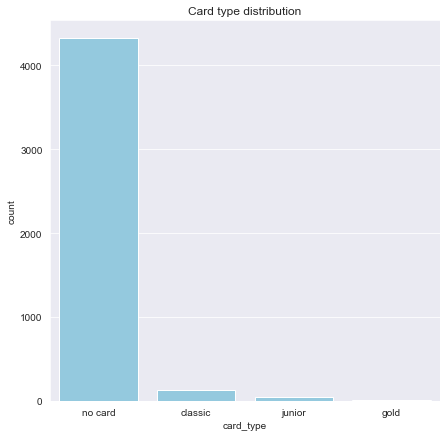

In [66]:
colors = sns.color_palette('bright')[0:5]
plt.pie(card['type'].value_counts(), labels=["classic", "gold", "junior"], colors = colors, autopct='%1.1f%%')
plt.title("Card type proportion")
plt.savefig("../plots/card_type_pie.png", bbox_inches='tight')
plt.show()

sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.countplot(data=card, x="type", color="skyblue", order=card["type"].value_counts().index )
plt.title("Card type distribution")
plt.savefig("../plots/card_type_count.png", bbox_inches='tight')
plt.show()


colors = sns.color_palette('bright')[0:5]
card_disp_client.loc[card_disp_client["card_type"].isna()] = "no card"

plt.pie(card_disp_client['card_type'].value_counts(), labels=["no card", "classic", "junior", "gold"],colors = colors, autopct='%1.1f%%',
explode = [0.1,0.1,0.2,0.5])
plt.title("Card type proportion")
plt.savefig("../plots/card_type_with_none_pie.png", bbox_inches='tight')
plt.show()

sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.countplot(data=card_disp_client, x="card_type", color="skyblue", order=card_disp_client["card_type"].value_counts().index )
plt.title("Card type distribution")
plt.savefig("../plots/card_type_with_none_count.png", bbox_inches='tight')
plt.show()
#plt.title()
  

### Card type by sex

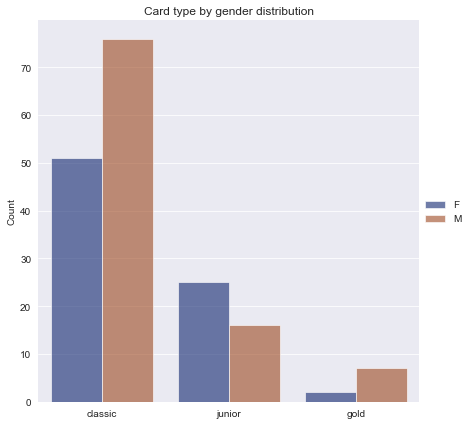

In [67]:
sns.set_style(style="darkgrid")

card_disp_client.loc[card_disp_client["card_type"] == "no card"] = np.nan


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=card_disp_client, kind="count",
    x="card_type", hue="gender",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Count")
g.legend.set_title("")
plt.title("Card type by gender distribution")
plt.savefig("../plots/card_gender_count.png", bbox_inches='tight')


### Account issuance

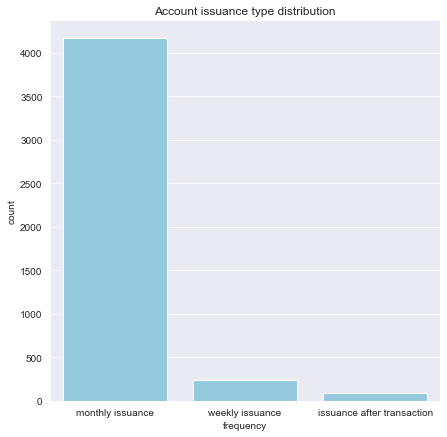

In [68]:
sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)
sns.countplot(data=account, x="frequency", color="skyblue", order=account["frequency"].value_counts().index )
plt.title("Account issuance type distribution")
plt.savefig("../plots/issuance_count.png", bbox_inches='tight')

plt.show()

### Urban inhabitants vs inhabitant number and average salary

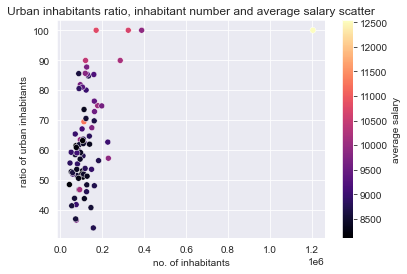

In [69]:
fig, ax = plt.subplots()
sns.scatterplot(district, x="no. of inhabitants", y="ratio of urban inhabitants ", hue="average salary ", palette="magma" )
norm = plt.Normalize(district["average salary "].min(), district["average salary "].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, label="average salary")
#ax.legend(ax.plot(), loc='right', label="hey")
#ax.set_xlabel("no. of inhabitants")
plt.title("Urban inhabitants ratio, inhabitant number and average salary scatter")
plt.savefig("../plots/urbanratio_inhabitant_avgsalary_scatter.png", bbox_inches='tight')
plt.show()

### Loan amount distribution

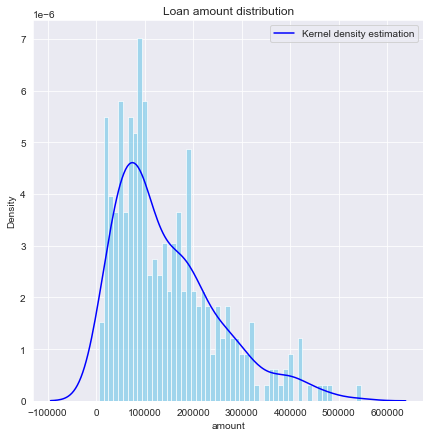

In [70]:
sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)

hp = sns.histplot(data=loan, x="amount", color="skyblue", binwidth=10000, stat="density")
kp = sns.kdeplot(data=loan, x="amount", color="blue", ax=hp, label="Kernel density estimation")
#plt.title(fig_title)
plt.legend()
plt.title("Loan amount distribution")

plt.savefig("../plots/loan_amount_dist.png", bbox_inches='tight')
plt.show()

### Average salary distribution

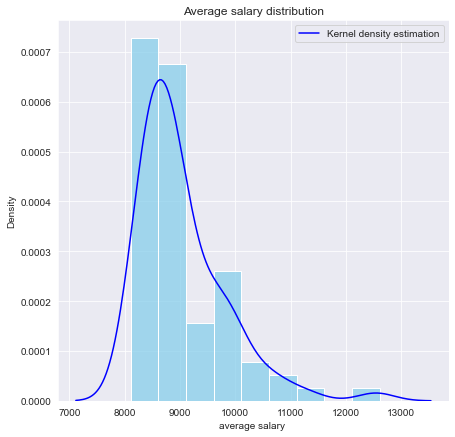

In [71]:
sns.set_style(style="darkgrid")
fig = plt.gcf()
fig.set_size_inches(7, 7)

hp = sns.histplot(data=district, x="average salary ", color="skyblue", binwidth=500, stat="density")
kp = sns.kdeplot(data=district, x="average salary ", color="blue", ax=hp, label="Kernel density estimation")
#plt.title(fig_title)
plt.legend()
plt.title("Average salary distribution")
plt.savefig("../plots/avg_salary_dist.png", bbox_inches='tight')
plt.show()

### 

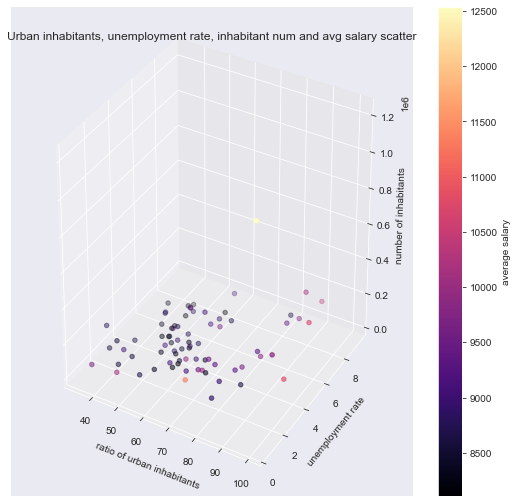

In [100]:
fig = plt.figure()
fig.set_size_inches(9, 9)

ax = fig.add_subplot(111, projection = '3d')

x = district["ratio of urban inhabitants "]
y = district["unemploymant rate '96 "]
z = district["no. of inhabitants"]
c = district["average salary "]

ax.set_xlabel("ratio of urban inhabitants")
ax.set_ylabel("unemployment rate")
ax.set_zlabel("number of inhabitants")

img = ax.scatter(x, y, z, c=c, cmap="magma")
fig.colorbar(img,label="average salary")
plt.title("Urban inhabitants, unemployment rate, inhabitant num and avg salary scatter")
plt.savefig("../plots/urbanratio_inhabitant_unemployment_avgsalary_scatter.png", bbox_inches='tight')

plt.show()

### Loan payments vs loan amount with loan duration

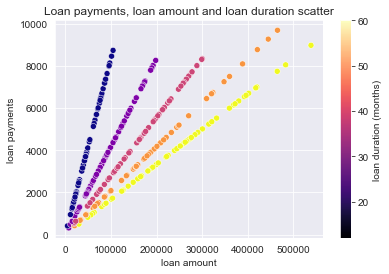

In [73]:
fig, ax = plt.subplots()
sns.scatterplot(loan, x='amount', y='payments', hue='duration', palette="plasma" )
norm = plt.Normalize(loan['duration'].min(), loan['duration'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, label="loan duration (months)")
#ax.legend(ax.plot(), loc='right', label="hey")
ax.set_xlabel("loan amount")
ax.set_ylabel("loan payments")
plt.title("Loan payments, loan amount and loan duration scatter")
plt.savefig("../plots/payments_loanamount_duration_scatter.png", bbox_inches='tight')
plt.show()


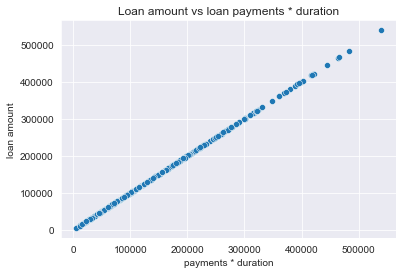

In [74]:
loan['payment_duration'] = loan['duration'] * loan['payments']

fig, ax = plt.subplots()
sns.scatterplot(loan,  x='payment_duration', y='amount')
ax.set_xlabel("payments * duration")
ax.set_ylabel("loan amount")
plt.title("Loan amount vs loan payments * duration")
plt.savefig("../plots/loanamount_paymentduration_scatter.png", bbox_inches='tight')

plt.show()

### Loan payments vs loan amount with status

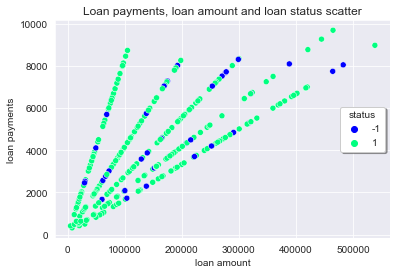

In [97]:
fig, ax = plt.subplots()
scatter = sns.scatterplot(loan, x='amount', y='payments', hue='status', palette="winter", legend=True )

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.set_xlabel("loan amount")
ax.set_ylabel("loan payments")
#plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.title("Loan payments, loan amount and loan status scatter")
scatter.legend(fontsize = 10, \
               loc="center right", \
               title="status", \
               title_fontsize = 10, \
               shadow = True, \
               facecolor = 'white');
plt.savefig("../plots/payments_loanamount_status_scatter.png", bbox_inches='tight')
plt.show()

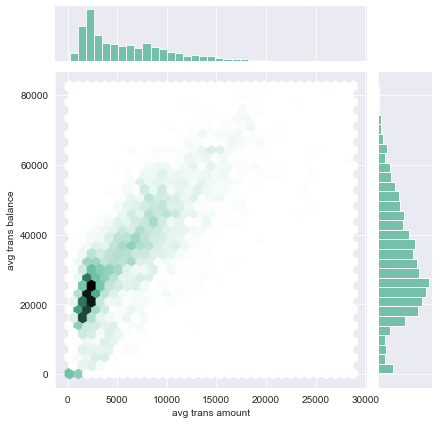

In [128]:
complete2 = pd.merge(account, pd.DataFrame(trans.groupby('account_id').amount.mean().round(2)).rename(columns={'amount':'avg trans amount'}), right_index=True, left_on='account_id', how="outer")
complete2 = pd.merge(complete2, pd.DataFrame(trans.groupby('account_id').balance.mean().round(2)).rename(columns={'balance':'avg trans balance'}), right_index=True, left_on='account_id', how="outer")

sns.jointplot(x=complete2['avg trans amount'], y=complete2['avg trans balance'], kind="hex", color="#4CB391")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 6))
df.groupby(['owner_gender', "status"]).size().unstack(level=1).plot(kind='barh', stacked=True, ax=axes[2])

plt.show()

In [76]:
trans_acc = pd.merge(trans, account, on='account_id')
trans_acc.head()
#transactions per account
max(trans_acc['account_id'].value_counts())

441

In [77]:
loan_acc = pd.merge(loan, account, on='account_id')
print(loan.shape[0], account.shape[0])
max(loan_acc['account_id'].value_counts())

328 4500


1

In [78]:
no_owners_per_account = disp['account_id'].value_counts()
print(no_owners_per_account.max())
print(no_owners_per_account.min())
print(no_owners_per_account.std())
print(no_owners_per_account.mean())

2
1
0.39478328746806
1.193111111111111


In [102]:
complete = pd.read_csv('processed/data_3it.csv',sep=',')
complete

,loan_id,duration,payments,frequency,balance_mean,balance_count,balance_std,balance_min,negative_balance,type_0_mean,...,avg_mth_income,ratio_real_salary_to_expected,ratio_withd_credit_mth,owner_age_on_loan,ratio_max_value_in_account_to_loan,ratio_expected_income_to_payments,real_income_to_payments_ratio,log_sanctions_std,log_ratio_max_value_in_acc_to_loan,status
0,5314,12,8033,2,12250.000000,4,8330.866301,1100.0,0.0,5025.000000,...,804.166667,6.248705,0.000000,45.986301,0.208515,0.100108,0.625545,0.000000,0.189392,-1
1,5316,36,4610,1,52083.859459,37,29122.059454,700.0,0.0,13523.158824,...,697.416667,-3.483008,-1.179626,24.986301,0.726156,0.151283,-0.526921,0.000000,0.545897,1
2,6863,60,2118,1,30060.954167,24,11520.184451,800.0,0.0,5009.733333,...,699.166667,-1.555089,-1.217031,57.191781,0.390230,0.330107,-0.513346,0.000000,0.329469,1
3,5325,36,2939,1,41297.480000,25,14151.260443,1000.0,0.0,9254.600000,...,837.083333,2.492583,-0.774545,53.323288,0.622836,0.284819,0.709935,0.000000,0.484175,1
4,7240,60,4579,2,57188.211111,27,25256.665817,600.0,0.0,21255.930769,...,690.666667,6.450189,-0.790415,15.008219,0.447307,0.150834,0.972905,0.000000,0.369705,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,48,3242,1,44197.509884,172,11044.494392,200.0,0.0,6448.582857,...,749.500000,3.493161,-0.594000,25.693151,0.483845,0.231184,0.807564,0.000000,0.394637,1
324,5625,60,3703,1,55230.444068,59,26510.559286,800.0,0.0,13417.557143,...,736.916667,-12.914662,-1.709297,57.780822,0.588078,0.199005,-2.570086,0.000000,0.462524,-1
325,6805,48,938,1,41994.907692,39,13151.510254,800.0,0.0,8544.930000,...,848.083333,1.851821,-0.816207,39.660274,1.413897,0.904140,1.674305,0.000000,0.881242,1
326,7233,36,3217,1,56646.516129,124,21971.162852,1100.0,0.0,16554.986275,...,702.250000,-11.628922,-1.493290,43.597260,1.032080,0.218293,-2.538517,0.000000,0.709060,1


In [80]:
display(complete.describe())
display(complete.skew())
complete.kurtosis()

,loan_id,duration,payments,frequency,balance_mean,balance_count,balance_std,balance_min,negative_balance,type_0_mean,...,avg_mth_income,ratio_real_salary_to_expected,ratio_withd_credit_mth,owner_age_on_loan,ratio_max_value_in_account_to_loan,ratio_expected_income_to_payments,real_income_to_payments_ratio,log_sanctions_std,log_ratio_max_value_in_acc_to_loan,status
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,6205.658537,35.853659,4150.932927,1.100610,43292.897145,74.676829,18252.081121,630.187500,0.039634,11886.019407,...,741.788362,-2.079809,-1.228208,36.278525,1.079559,0.296011,-0.466886,0.073901,0.639974,0.719512
std,667.985675,16.734752,2193.620989,0.448169,13280.435504,44.843859,7359.406050,1106.068371,0.195396,5380.920995,...,266.906558,13.455784,0.662269,12.553467,1.133733,0.329496,2.778518,0.637881,0.392889,0.695541
min,4959.000000,12.000000,319.000000,0.000000,12250.000000,4.000000,5423.587577,-3424.600000,0.000000,2590.102941,...,-1424.988095,-73.068953,-4.784484,13.583562,0.088684,-0.203628,-10.935585,0.000000,0.084969,-1.000000
25%,5604.250000,24.000000,2368.750000,1.000000,32592.166019,39.000000,11810.935935,300.000000,0.000000,7720.723579,...,709.333333,-8.226256,-1.503752,25.464384,0.437902,0.129708,-1.620772,0.000000,0.363185,1.000000
50%,6227.500000,36.000000,3878.500000,1.000000,42183.600179,69.000000,18556.828635,600.000000,0.000000,11504.724444,...,747.208333,-1.598888,-1.174495,35.535616,0.694481,0.196139,-0.461747,0.000000,0.527376,1.000000
75%,6737.250000,48.000000,5907.750000,1.000000,53012.584864,103.500000,24215.471913,900.000000,0.000000,15922.043683,...,824.750000,3.122432,-0.731822,46.761644,1.334052,0.328359,0.585761,0.000000,0.847576,1.000000
max,7308.000000,60.000000,9689.000000,2.000000,76232.700000,196.000000,35314.527845,13097.700000,1.000000,26907.226923,...,1045.083333,123.987020,0.000000,60.857534,9.544031,2.366771,15.382344,7.930348,2.355560,1.000000


loan_id                               -0.126360
duration                               0.055892
payments                               0.269339
frequency                              0.438944
balance_mean                           0.233925
                                        ...    
ratio_expected_income_to_payments      3.066076
real_income_to_payments_ratio          1.201905
log_sanctions_std                     10.761846
log_ratio_max_value_in_acc_to_loan     1.319319
status                                -2.081621
Length: 88, dtype: float64

loan_id                                -1.168538
duration                               -1.267191
payments                               -0.846561
frequency                               1.589927
balance_mean                           -0.702209
                                         ...    
ratio_expected_income_to_payments      11.930173
real_income_to_payments_ratio           8.051796
log_sanctions_std                     123.262010
log_ratio_max_value_in_acc_to_loan      2.003292
status                                  2.347424
Length: 88, dtype: float64

### Correlation matrix on the complete dataset

,loan_id,duration,payments,negative_balance,type_0_mean,type_1_min,rem_another_bank,rem_another_bank_mean,rem_another_bank_std,credit_card_withd,...,ratio_credit_cash,ratio_withd_cash,owner_count,owner_gender,unemploymant_delta,withdrawal_mth,ratio_real_salary_to_expected,ratio_max_value_in_account_to_loan,ratio_expected_income_to_payments,status
0,5314,12,8033,0.0,5025.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.000000,0.000000,1,0,0.29,0.000000,6.248705,0.208515,0.100108,-1
1,5316,36,4610,0.0,13523.158824,-14.6,8.0,-2682.375000,1462.736373,0.0,...,0.351351,0.432432,1,1,0.52,-3233.567568,-3.483008,0.726156,0.151283,1
2,6863,60,2118,0.0,5009.733333,-66.0,3.0,-2824.333333,4431.462324,0.0,...,0.083333,0.583333,1,1,0.61,-1075.941176,-1.555089,0.390230,0.330107,1
3,5325,36,2939,0.0,9254.600000,-14.6,2.0,-6994.000000,0.000000,0.0,...,0.080000,0.600000,1,0,0.29,-1162.394595,2.492583,0.622836,0.284819,1
4,7240,60,4579,0.0,21255.930769,-30.0,3.0,-6584.666667,5047.773404,0.0,...,0.037037,0.629630,1,1,0.73,-2470.735294,6.450189,0.447307,0.150834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,6818,48,3242,0.0,6448.582857,-14.6,36.0,-1709.000000,890.454523,0.0,...,0.151163,0.639535,2,0,0.99,-166.300673,3.493161,0.483845,0.231184,1
324,5625,60,3703,0.0,13417.557143,-14.6,0.0,0.000000,0.000000,0.0,...,0.271186,0.728814,1,1,0.78,-1801.145550,-12.914662,0.588078,0.199005,-1
325,6805,48,938,0.0,8544.930000,-14.6,6.0,-3387.500000,1458.585171,0.0,...,0.205128,0.641026,1,0,1.12,-977.724053,1.851821,1.413897,0.904140,1
326,7233,36,3217,0.0,16554.986275,-14.6,0.0,0.000000,0.000000,0.0,...,0.258065,0.741935,1,1,0.42,-1267.763947,-11.628922,1.032080,0.218293,1


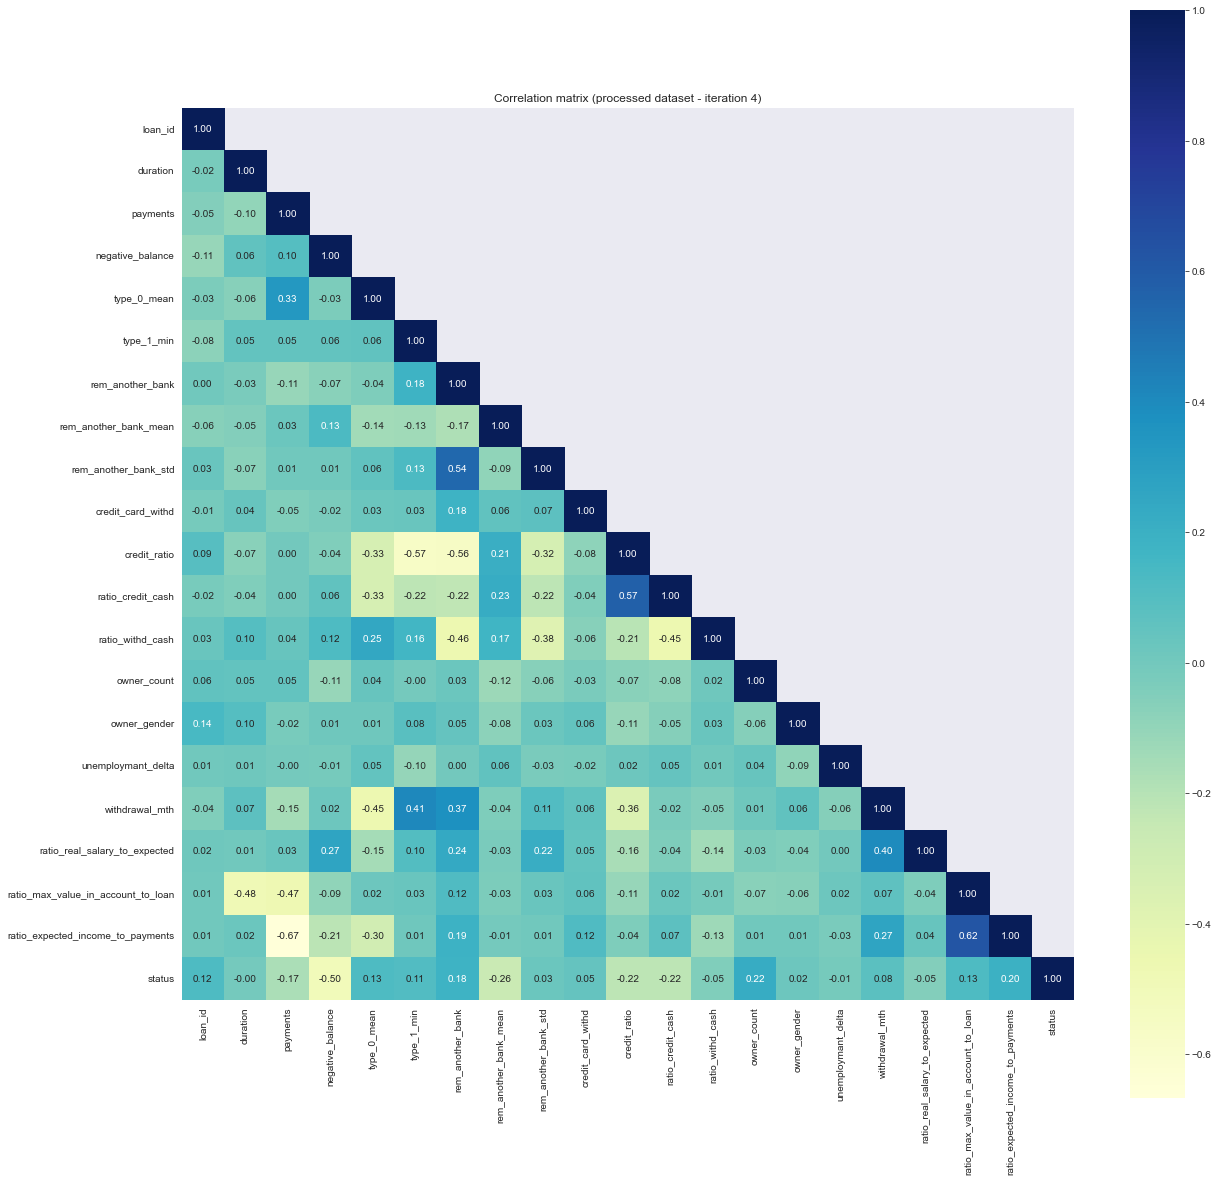

In [81]:
complete = pd.read_csv('processed/data_4it.csv',sep=',')
complete.drop(['ratio_interest'], axis=1, inplace=True)
dataset_corr = complete.corr()
display(complete)
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
plt.title("Correlation matrix (processed dataset - iteration 4)")
sns.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

In [82]:
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm

reg = sm.OLS(complete["status"], sm.add_constant(complete[['duration', 'payments', 'negative_balance', 
    'type_0_mean', 'type_1_min', 'rem_another_bank', 'rem_another_bank_mean', 'rem_another_bank_std', 
    'credit_card_withd', 'credit_ratio', 'ratio_credit_cash', 'ratio_withd_cash', 'owner_count', 
    'unemploymant_delta', 'withdrawal_mth', 'ratio_real_salary_to_expected','ratio_max_value_in_account_to_loan', 
    'ratio_expected_income_to_payments']])).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 status   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     10.90
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           5.79e-24
Time:                        19:25:23   Log-Likelihood:                -265.18
No. Observations:                 328   AIC:                             568.4
Df Residuals:                     309   BIC:                             640.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.3389      0.609      2.197      0.029       0.140       2.538
duration                              -0.0010      0.003     -0.397      0.692      -0.006       0.004
payments                           -5.354e-05   2.09e-05     -2.560      0.011   -9.47e-05   -1.24e-05
negative_balance                      -1.6178      0.180     -8.966      0.000      -1.973      -1.263
type_0_mean                         1.835e-05    9.1e-06      2.016      0.045    4.37e-07    3.63e-05
type_1_min                          1.533e-05   1.79e-05      0.855      0.393      -2e-05    5.06e-05
rem_another_bank                       0.0001      0.005      0.023      0.982      -0.009       0.009
rem_another_bank_mean              -2.007e-05      1e-05     -2.008      0.046   -3.97e-05   -4.01e-07
rem_another_bank_std               -6.404e-05   3.74e-05     -1.711      0.088      -0.000     9.6e-06
credit_card_withd                      0.0187      0.054      0.344      0.731      -0.088       0.126
credit_ratio                          -0.5120      0.502     -1.019      0.309      -1.500       0.476
ratio_credit_cash                     -0.5239      0.364     -1.441      0.151      -1.239       0.192
ratio_withd_cash                      -0.6560      0.569     -1.153      0.250      -1.775       0.463
owner_count                            0.2341      0.076      3.087      0.002       0.085       0.383
unemploymant_delta                    -0.0148      0.079     -0.187      0.852      -0.171       0.141
withdrawal_mth                      2.233e-05   4.05e-05      0.552      0.582   -5.73e-05       0.000
ratio_real_salary_to_expected          0.0037      0.003      1.205      0.229      -0.002       0.010
ratio_max_value_in_account_to_loan    -0.0153      0.052     -0.294      0.769      -0.118       0.087
ratio_expected_income_to_payments      0.0457      0.168      0.272      0.786      -0.285       0.376
==============================================================================
Omnibus:                      120.326   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.390
Skew:                          -1.818   Prob(JB):                     2.65e-65
Kurtosis:                       5.922   Cond. No.                     3.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""